<hr size="4" color="blue">
<p style="text-align: center;"><span style="color: #0000ff;"><font size="+5"><strong> Stationnarité
<hr size="4" color="blue">

https://fra.wiki/wiki/Stazionariet%C3%A0

https://moncoachdata.com/blog/modele-arima-avec-python/

# import

## bibliothèque

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import locale
from datetime import datetime
import warnings
warnings.simplefilter("ignore")#, UserWarning
import datetime
import statsmodels.api as sm

## Données simulé

In [2]:
Names=['Times','Pression']
Type ={'Pression': float}#,dtype=Type
# Données avec tout les effets + effet
dfSimu=pd.read_csv('Data/Simulate/Simulated.csv',header=0,skiprows=0, parse_dates=['Times'],names=Names,index_col=0)
# Données avec saisonnalité uniquement
dfSea=pd.read_csv('Data/Simulate/SimulatedSeasonality.csv',dtype=Type,header=0,skiprows=0, parse_dates=['Times'],names=Names,index_col=0)
# Données stationnaire
dfsta=pd.read_csv('Data/Simulate/SimulatedStationnaire.csv',header=0,skiprows=0, parse_dates=['Times'],names=Names,index_col=0)
# Donnes avec une tendance
dfTrend=pd.read_csv('Data/Simulate/SimulatedTrend.csv',dtype=Type,header=0,skiprows=0, parse_dates=['Times'],names=Names,index_col=0)
#Donnees avec trend and saisonalité
dfTrendSais=pd.read_csv('Data/Simulate/SimulatedTrendSaisonality.csv',dtype=Type,header=0,skiprows=0, parse_dates=['Times'],names=Names,index_col=0)


<div style="border: 2px solid #C0392B; padding: 3px; background-color: #E6B0AA; -moz-border-radius-topleft: 5px; -moz-border-radius-topright: 5px; -moz-border-radius-bottomright: 5px; -moz-border-radius-bottomleft: 5px;">
  

La notion de stationnarité est importante dans la modélisation de séries temporelles, le problème de régression fallacieuse montrant qu'une régression linéaire avec des variables non-stationnaires n'est pas valide.

La stationnarité joue également un rôle important dans la prédiction de séries temporelles, l'intervalle de prédiction étant différent selon que la série est stationnaire ou non.

# 1) Pourquoi s'interesse t'on à la stationnarité d'une série 

<div style="border: 2px solid #1EF223; padding: 3px; background-color: #DEFFCD; -moz-border-radius-topleft: 5px; -moz-border-radius-topright: 5px; -moz-border-radius-bottomright: 5px; -moz-border-radius-bottomleft: 5px;">

Une des grandes questions dans l'étude de séries temporelles (ou chronologiques) est de savoir si celles-ci suivent un processus stationnaire. On entend par là le fait que la structure du processus sous-jacent supposé évolue ou non avec le temps. Si la structure reste la même, le processus est dit alors stationnaire. Ainsi, si le processus est stationnaire, ses propriétés ne sont pas affectées par un changement de notre « repère temporel » : que l'on regarde au point t ou au point t+k la série aura toujours le même comportement.

Si une série temporelle est stationnaire et présente un comportement particulier pendant un intervalle de temps donné, on peut supposer sans risque de se tromper qu’elle présentera le même comportement à un moment ultérieur. La plupart des méthodes de modélisation statistique supposent ou exigent que la série temporelle soit stationnaire.
***Donc construire pour construire un modèle de prévision, nous devons nous assurer que la série temporelle est stationnaire.***

# 2) Qu’est ce que qu’une série stationnaire?

Chercher à stationarise une série reviens à es poser la question de ce qui caractérise son évolution : La tendance et la saisonnalités.


<div style="border: 2px solid #0000ff; padding: 3px; background-color: #0099FF; -moz-border-radius-topleft: 5px; -moz-border-radius-topright: 5px; -moz-border-radius-bottomright: 5px; -moz-border-radius-bottomleft: 5px;">
    
- 1  La première condition est que l'espérance est constante au cours du temps, ***il n'y a donc pas de tendance.***
- 2 La seconde condition dispose que la ***variance est constante*** au cours du temps et non infinie.
- 3 Troisième condition :  la position dans le temps ne pas jouée de rôle alors la troisième condition est remplie (L'auto-corrélationou auto-covariance). la covariance du i-ème terme et du (i + m)-ième terme ne doit pas être fonction du temps.On remarquera que celle-ci inclut la deuxième si l'on prend k=0 car alors l'auto-covariance correspond à la variance. 

La ***stationnarité faible est dit stationnarité du second ordre***, car sa définition se base exclusivement sur les deux premiers moments de la serie


1. La moyenne de la série ne doit pas être fonction du temps. Le graphique rouge ci-dessous n’est pas stationnaire car la moyenne augmente avec le temps.

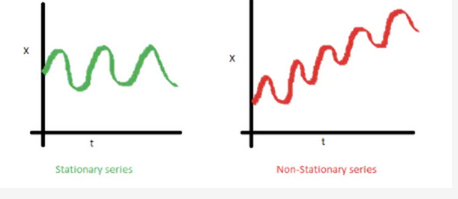

In [4]:
from IPython.display import Image
Image("./Figure/1.png", width = 600, height = 300)

2. La variance de la série ne doit pas être une fonction du temps. Notez dans le graphique rouge ci-dessous la variance des données qui varient dans le temps.

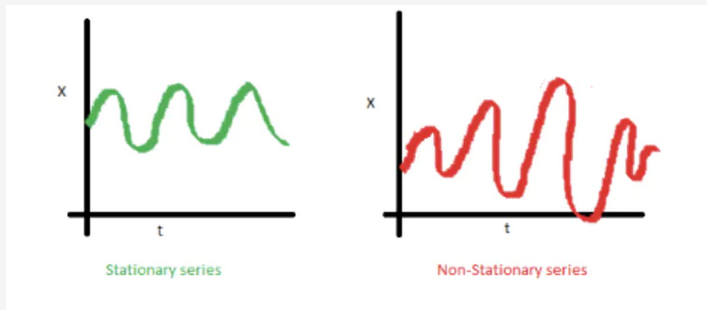

In [5]:
from IPython.display import Image
Image("./Figure/2.png", width = 600, height = 300)

3. Enfin, la covariance du i-ème terme et du (i + m)-ième terme ne doit pas être fonction du temps. Dans le graphique suivant, vous remarquerez que l’écart se rapproche à mesure que le temps augmente. Par conséquent, la covariance n’est pas en rapport avec le temps pour la “série rouge”.

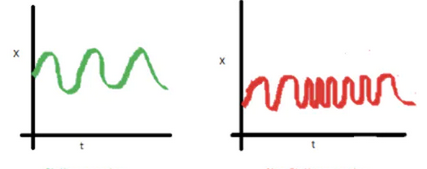

In [6]:
from IPython.display import Image
Image("./Figure/3.png", width = 600, height = 300)

# 3) Outil d'analyse

## 3.1) ACF et pacf

Une façon d'identifier les séries chronologiques non stationnaires consiste à tracer la fonction d' autocorrélation (ACF). Pour une série temporelle stationnaire, la fonction d'autocorrélation tendra vers zéro assez rapidement, tandis que la fonction d'autocorrélation des données non stationnaires décroît lentemen

In [6]:
Names=['Times','Pression']
Type ={'Pression': float}#,dtype=Type
dfsta=pd.read_csv('Data/Simulate/SimulatedStationnaire.csv',header=0,skiprows=0, parse_dates=['Times'],names=Names,index_col=0)

In [7]:
Names=['Times','Pression']
Type ={'Pression': float}#,dtype=Type
dfD=pd.read_csv('Data/Simulate/SimulatedTrendSaisonality.csv',dtype=Type,header=0,skiprows=0, parse_dates=['Times'],names=Names,index_col=0)

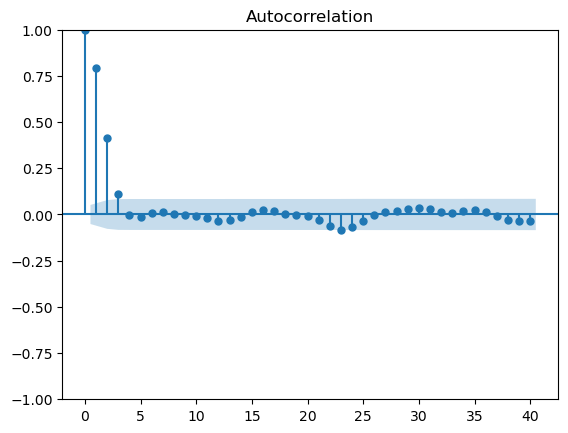

In [8]:
sm.graphics.tsa.plot_acf(dfsta['Pression'], lags=40)
plt.savefig("ACF_stationnaire.png")
plt.show()

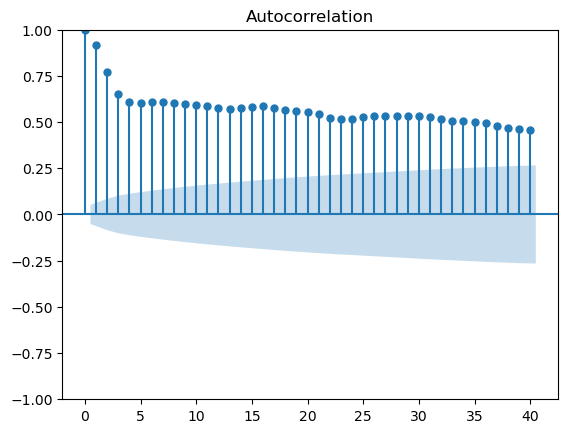

In [9]:
sm.graphics.tsa.plot_acf(dfD['Pression'], lags=40)
plt.savefig("ACF_Non_stationnaire.png")
plt.show()

## 3.2) Differenciation 

Une premiére façon d'avoir une série chronologique stationnaire consiste à calculer les différences entre des observations consécutives. C'est ce qu'on appelle la différenciation. La différenciation peut aider à stabiliser la moyenne d'une série chronologique en supprimant les changements de niveau d'une série chronologique, éliminant ainsi les tendances et la saisonnalité.

Une série présentant une tendance et/ou une saisonnalité (elle sont nombreuses dans le quotidien du data analyst !) ne pourra pas être modélisée par un processus stationnaire. Une technique communément employée est de travailler non pas sur la série mais sur des différences de la série
***On peut donc transformé un processus non stationnaire par différenciation pour obtenir un processus stationnaire***

In [10]:
from statsmodels.tsa.statespace.tools import diff
diff(dfSea["Pression"], k_diff=1, k_seasonal_diff=None, seasonal_periods=1)


Times
2018-01-01 23:15:00    0.133097
2018-01-01 23:20:00   -0.203581
2018-01-01 23:25:00   -0.441135
2018-01-01 23:30:00    0.762539
2018-01-01 23:35:00    1.177971
                         ...   
2018-01-06 22:45:00   -0.267659
2018-01-06 22:50:00    0.083647
2018-01-06 22:55:00   -0.198291
2018-01-06 23:00:00   -0.634226
2018-01-06 23:05:00    0.311598
Name: Pression, Length: 1439, dtype: float64

## 3.3) Test d'hypothèses sur la stationnaire

###  Test d'hypothése

<div style="border: 2px solid #0000ff; padding: 3px; background-color: #0099FF; -moz-border-radius-topleft: 5px; -moz-border-radius-topright: 5px; -moz-border-radius-bottomright: 5px; -moz-border-radius-bottomleft: 5px;">
 
Un test d'hypothèse, est une procédure de décision entre deux hypothèses. Il s'agit d'une démarche consistant à ***rejeter*** ou à ***ne pas rejeter une hypothèse*** statistique, appelée hypothèse nulle, en fonction d'un échantillon de données.

L'hypothèse nulle notée H0 est celle que l'on considère vraie a priori. Le but du test est de décider si cette hypothèse est a priori crédible. L'hypothèse alternative notée H1 est l'hypothèse complémentaire à l'hypothèse nulle.

Ces deux hypothèses ne sont toutefois pas symétriques:  H1 est choisie uniquement par défaut si H0 n'est pas considérée comme crédible. 
 
il s'agit de comparer la valeur p à un seuil $\alpha$ appellé la p-valeur .

- Si la valeur p est supérieure à $\alpha$, il n'est pas exceptionnel sous H0 d'observer la valeur effectivement observée. Par conséquent, H0 n'est pas rejetée.
- Si la valeur p est inférieure à $\alpha$, la valeur observée est jugée exceptionnelle sous H0. On décide alors de rejeter H0 et de valider H1.

Cette méthode possède l'avantage de permettre de se rendre compte à quel point la décision du test est sûre : la position de la valeur p par rapport à $\alpha$ ne dépend pas de l'échelle des données, contrairement à Sobs et au(x) seuil(s) de la région de rejet.

Les valeurs du risque $\alpha$ couramment utilisées varient généralement entre 0,01 et 0,05.

### Stationnarité

Il est possible de déterminer par un test si la série est stationnaire ou non. Il en existe deux types, avec la stationnarité comme hypothèse nulle ou hypothèse alternative :


- L'hypothèse nulle est la stationnarité.

    - ***Test KPSS***
    - Test de Leybourne et McCabe
    - Tests de racine unitaire

- L'hypothèse nulle est la non-stationnarité.

    - ***Test de Dickey Fuller***
    - Test augmenté de Dickey Fuller(ADF)
    - Test de Phillips-Perron
    - Test DF-GLS (ou ERS)

Afin de verifier si une serié est stationnairb,On pourrait  Tracer la moyenne mobile et l’écart-type mobile. La série temporelle est stationnaire si elle reste constante dans le temps (à l’œil nu, regardez si les lignes sont droites et parallèles à l’axe des x)



https://www.youtube.com/watch?v=iB39rGQmeYI
 
 

### Mise en oeuvre

In [11]:
Names=['Times','Pression']
Type ={'Pression': float}#,dtype=Type
dfSimu=pd.read_csv('Data/Simulate/SimulatedClean.csv',dtype=Type,header=0,skiprows=0, parse_dates=['Times'],names=Names,index_col=0)

In [12]:
Names=['Times','Pression']
Type ={'Pression': float}#,dtype=Type
dfSimu=pd.read_csv('Data/Simulate/SimulatedClean.csv',dtype=Type,header=0,skiprows=0, parse_dates=['Times'],names=Names,index_col=0)

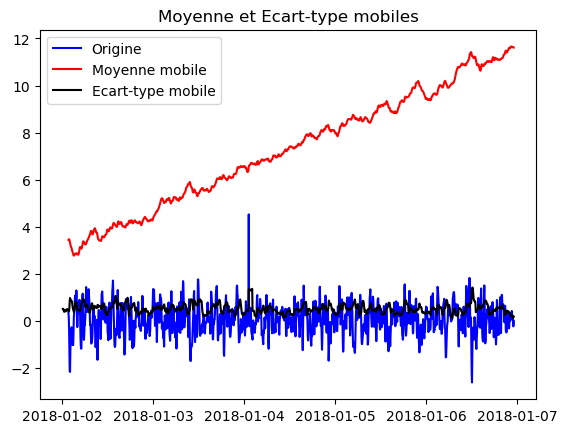

In [13]:
rolling_mean = dfTrend.rolling(window = 30).mean()
rolling_std = dfTrend.rolling(window = 12).std()
plt.plot(dfTrend-rolling_mean, color = 'blue', label = 'Origine')
plt.plot(rolling_mean, color = 'red', label = 'Moyenne mobile')
plt.plot(rolling_std, color = 'black', label = 'Ecart-type mobile')
plt.legend(loc = 'best')
plt.title('Moyenne et Ecart-type mobiles')
plt.savefig('plot_MM_Detrend.png')
plt.show()

Comme vous pouvez le voir, la moyenne mobile et l’écart-type mobile augmentent avec le temps. Nous pouvons donc conclure que la série temporelle n’est pas stationnaire.

#### Test Q de Ljung-Box

Le Test Q de Ljung-Box ou Test de Ljung-Box est un test statistique qui teste l'auto-corrélation d'ordre supérieur à 1. Il s'agit d'un test asymptotique qui n'a donc qu'une puissance très faible dans le cadre de petits échantillons.

L'hypothèse nulle (H0) stipule qu'il n'y a pas auto-corrélation des erreurs d'ordre 1 à r. L'hypothèse de recherche (H1) stipule qu'il y a auto-corrélation des erreurs d'ordre 1 à r. 

In [14]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(dfsta['Pression'],lags=[5], return_df=True)

,lb_stat,lb_pvalue
5,1174.958242,7.798665e-252


#### Test de Fuller

https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

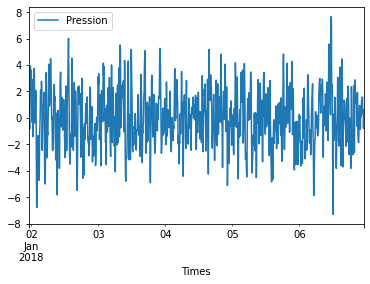

In [15]:
%matplotlib inline
dfsta.plot()
plt.savefig('plot_Stationnaire.png')

In [16]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(dfsta['Pression'])
print('Statistiques ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Statistiques ADF : -12.646472990190953
p-value : 1.3981971433237045e-23
Valeurs Critiques :
	1%: -3.434918371231736
	5%: -2.8635576234668982
	10%: -2.5678441693558898


In [17]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(dfTrend['Pression'])
print('Statistiques ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Statistiques ADF : -0.42076333442870495
p-value : 0.9065738971208985
Valeurs Critiques :
	1%: -3.434979825137732
	5%: -2.8635847436211317
	10%: -2.5678586114197954


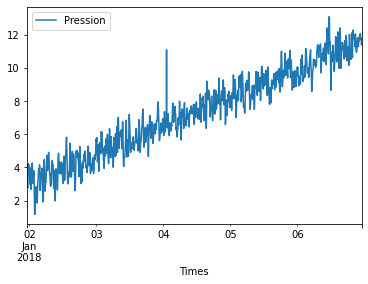

In [18]:
%matplotlib inline
dfTrend.plot()
plt.savefig('plot_NonStationnaire.png')

In [19]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(dfTrend['Pression'])
print('Statistiques ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Statistiques ADF : -0.42076333442870495
p-value : 0.9065738971208985
Valeurs Critiques :
	1%: -3.434979825137732
	5%: -2.8635847436211317
	10%: -2.5678586114197954


In [20]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(dfTrend['Pression'])
print('Statistiques ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Statistiques ADF : -0.42076333442870495
p-value : 0.9065738971208985
Valeurs Critiques :
	1%: -3.434979825137732
	5%: -2.8635847436211317
	10%: -2.5678586114197954


La série temporelle est considérée comme stationnaire si la valeur p est faible (selon l’hypothèse nulle) et si les valeurs critiques à des intervalles de confiance de 1%, 5%, 10% sont aussi proches que possible des statistiques de l’ADF 

#### Test kpss


In [21]:
from statsmodels.tsa.stattools import kpss
result = kpss(dfsta['Pression'], regression="c", nlags="auto")
print('Statistiques kpss : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[3].items():
    print('\t{}: {}'.format(key, value))

Statistiques kpss : 0.03868849851966237
p-value : 0.1
Valeurs Critiques :
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/home/ggassier/.conda/envs/GerinatEnvConda/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2002: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [22]:
from statsmodels.tsa.stattools import kpss
result = kpss(dfTrend['Pression'], regression="c", nlags="auto")
print('Statistiques kpss : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[3].items():
    print('\t{}: {}'.format(key, value))

Statistiques kpss : 5.796061134542459
p-value : 0.01
Valeurs Critiques :
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/home/ggassier/.conda/envs/GerinatEnvConda/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1998: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


La statistique ADF est loin des valeurs critiques et la p-value est supérieure au seuil (0,05). On peut donc conclure que la série temporelle n’est pas stationnaire.


# Annexe : Autre outil d'analyse

Il existe de multiples transformations que nous pouvons appliquer à une série temporelle pour la rendre stationnaire. Par exemple, soustraire la moyenne mobile :

In [23]:
def get_stationarity(timeseries):
    
    # Statistiques mobiles
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # tracé statistiques mobiles
    original = plt.plot(timeseries, color='blue', label='Origine')
    mean = plt.plot(rolling_mean, color='red', label='Moyenne Mobile')
    std = plt.plot(rolling_std, color='black', label='Ecart-type Mobile')
    plt.legend(loc='best')
    plt.title('Moyenne et écart-type Mobiles')
    plt.show(block=False)
    
    # Test Dickey–Fuller :
    result = adfuller(timeseries)
    print('Statistiques ADF : {}'.format(result[0]))
    print('p-value : {}'.format(result[1]))
    print('Valeurs Critiques :')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

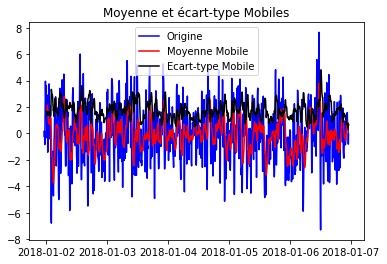

Statistiques ADF : -12.646472990190953
p-value : 1.3981971433237045e-23
Valeurs Critiques :
	1%: -3.434918371231736
	5%: -2.8635576234668982
	10%: -2.5678441693558898


In [24]:
get_stationarity(dfsta['Pression'])

<AxesSubplot:xlabel='Times'>

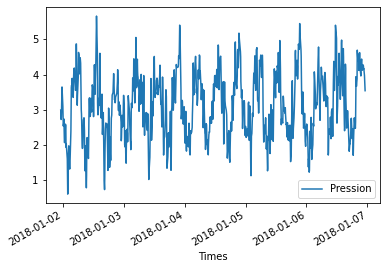

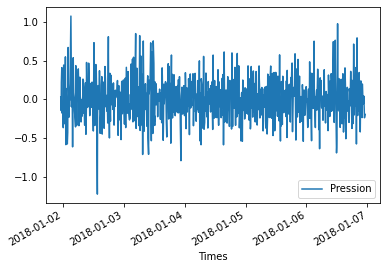

In [25]:
rolling_mean = dfSimu.rolling(window=2).mean()
df = dfSimu - rolling_mean
rolling_mean.plot()
df.plot()

Comme on peut le voir, après soustraction de la moyenne, la moyenne mobile et l’écart-type sont approximativement horizontaux. La p-value est inférieure au seuil de 0,05 et la statistique ADF est proche des valeurs critiques. Par conséquent, la série temporelle est stationnaire.

L’application de la décroissance exponentielle est une autre façon de transformer une série temporelle de manière à ce qu’elle soit stationnaire :

https://moncoachdata.com/blog/modele-arima-avec-python/

https://qastack.fr/stats/131092/does-a-seasonal-time-series-imply-a-stationary-or-a-non-stationary-time-series